# EDA

In [1]:
# ============================
# 1. Import libraries & settings
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.cluster.hierarchy import linkage, leaves_list

pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# ============================
# 2. Load dataset
# ============================
eda = pd.read_csv("../data/processed/wdi_hdr.csv")

In [3]:
# ============================
# 3. Core dataset overview
# ============================

# Quick structure
print("Shape:", eda.shape)
print("\nInfo:")
eda.info()

# Summary statistics for numeric variables
summary_stats = eda.describe().T
display(summary_stats)

# Custom overview: missingness, uniques, dtype
def overview(df):
    return pd.DataFrame({
        'dtype': df.dtypes,
        'non_null_count': df.count(),
        'missing_n': df.isna().sum(),
        'missing_%': df.isna().mean()*100,
        'unique_n': df.nunique()
    })
display(overview(eda))

# ============================
# Pre-EDA: Rename columns for simplicity
# ============================

eda = eda.rename(columns={
    "Unemployment, total (% of total labor force) (modeled ILO estimate)": "Unemployment",
    "Population density (people per sq. km of land area)": "Population density"
})

# Sort rows for consistency in later time-series analysis
eda = eda.sort_values(["Country_Name", "Year"])

Shape: (5712, 19)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   ISO3                                                                 5712 non-null   object 
 1   Country_Name                                                         5712 non-null   object 
 2   Year                                                                 5712 non-null   int64  
 3   Adolescent fertility rate (births per 1,000 women ages 15-19)        5712 non-null   float64
 4   Exports of goods and services (% of GDP)                             5712 non-null   float64
 5   Fertility rate, total (births per woman)                             5712 non-null   float64
 6   GDP growth (annual %)                                                5712 non-n

,count,mean,std,min,25%,50%,75%,max
Year,"5,712.00","2,006.50",9.81,"1,990.00","1,998.00","2,006.50","2,015.00","2,023.00"
"Adolescent fertility rate (births per 1,000 women ages 15-19)","5,712.00",58.77,46.92,0.54,18.51,47.73,88.63,212.25
Exports of goods and services (% of GDP),"5,712.00",38.73,27.14,0.01,21.01,32.86,48.92,228.99
"Fertility rate, total (births per woman)","5,712.00",3.17,1.69,0.72,1.74,2.67,4.38,8.61
GDP growth (annual %),"5,712.00",3.40,6.68,-64.05,1.40,3.75,5.97,149.97
GDP per capita (constant 2015 US$),"5,712.00","11,617.87","17,190.39",188.66,"1,371.73","4,000.30","12,545.22","112,417.88"
Imports of goods and services (% of GDP),"5,712.00",43.92,24.48,0.02,27.60,38.24,55.11,208.33
"Life expectancy at birth, total (years)","5,712.00",68.62,9.62,12.16,62.66,70.56,75.87,84.56
Mobile cellular subscriptions (per 100 people),"5,712.00",57.11,54.08,0.00,1.43,47.08,106.01,220.41
"Mortality rate, under-5 (per 1,000 live births)","5,712.00",46.46,52.53,2.10,9.40,24.45,66.22,478.90


,dtype,non_null_count,missing_n,missing_%,unique_n
ISO3,object,5712,0,0.00,168
Country_Name,object,5712,0,0.00,168
Year,int64,5712,0,0.00,34
"Adolescent fertility rate (births per 1,000 women ages 15-19)",float64,5712,0,0.00,5583
Exports of goods and services (% of GDP),float64,5712,0,0.00,5318
"Fertility rate, total (births per woman)",float64,5712,0,0.00,3088
GDP growth (annual %),float64,5712,0,0.00,5595
GDP per capita (constant 2015 US$),float64,5712,0,0.00,5625
Imports of goods and services (% of GDP),float64,5712,0,0.00,5318
"Life expectancy at birth, total (years)",float64,5712,0,0.00,5293


### Step 3. Core Dataset Overview
- Dataset contains global development indicators for 168 countries (1990–2023).
- Columns renamed for clarity.
- Both *Population growth* and *Urban population growth* are included. For modeling we may later focus only on total population growth.

In [4]:
# ============================
# 4. Duplicates check
# ============================
duplicates = eda.duplicated(subset=["ISO3", "Year"]).sum()
print(f"Duplicate rows (by ISO3-Year): {duplicates}")

Duplicate rows (by ISO3-Year): 0


In [5]:
# ============================
# 5. Panel balance check
# ============================
num_countries = eda['ISO3'].nunique()
num_years = eda['Year'].nunique()
print(f"Countries: {num_countries}, Years: {num_years}")
print(f"Expected rows: {num_countries * num_years}, Actual rows: {len(eda)}")

Countries: 168, Years: 34
Expected rows: 5712, Actual rows: 5712


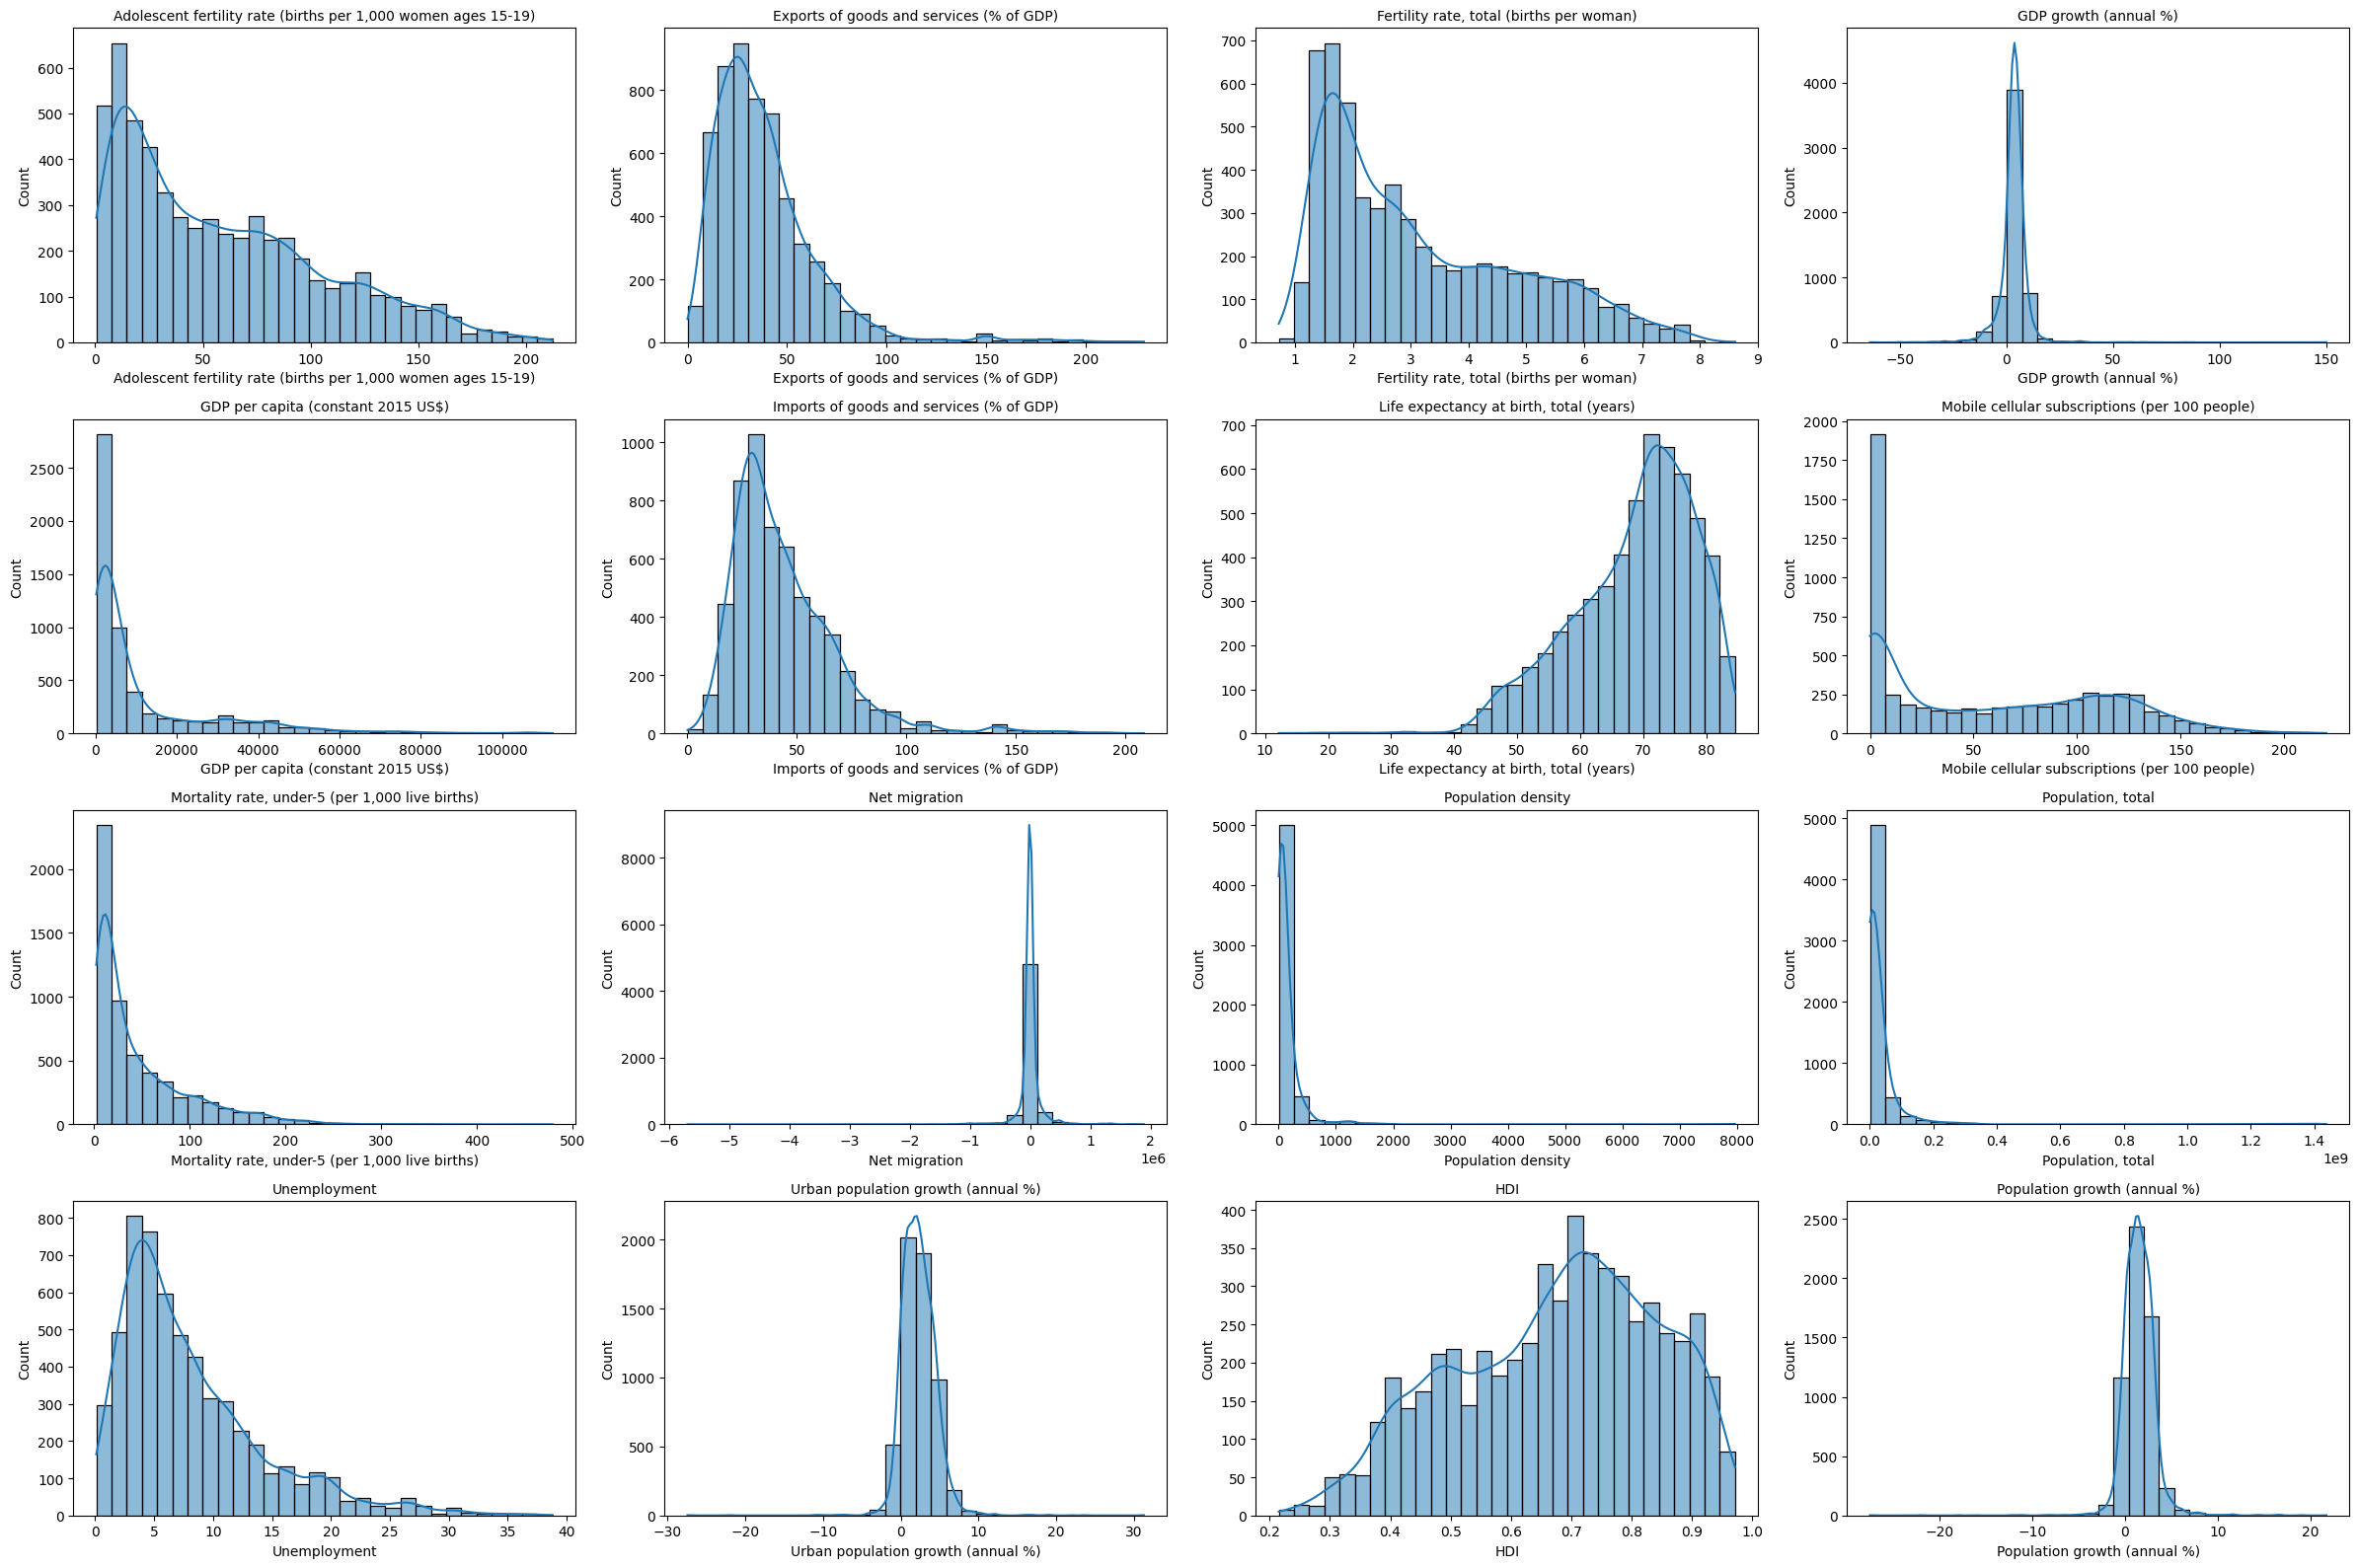

In [6]:
# ============================
# 6. Distribution plots for all indicators
# ============================
indicators = [
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Exports of goods and services (% of GDP)',
    'Fertility rate, total (births per woman)',
    'GDP growth (annual %)',
    'GDP per capita (constant 2015 US$)',
    'Imports of goods and services (% of GDP)',
    'Life expectancy at birth, total (years)',
    'Mobile cellular subscriptions (per 100 people)',
    'Mortality rate, under-5 (per 1,000 live births)',
    'Net migration',
    'Population density',
    'Population, total',
    'Unemployment',
    'Urban population growth (annual %)',
    'HDI',
    'Population growth (annual %)'
]

n_cols = 4
n_rows = math.ceil(len(indicators) / n_cols)

plt.figure(figsize=(n_cols*6, n_rows*4))
for i, col in enumerate(indicators, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(eda[col], kde=True, bins=30)
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()

In [7]:
# ============================
# 7. Create Net migration per 1000 people
# ============================
eda['Net migration per 1000'] = eda['Net migration'] / (eda['Population, total'] / 1000)

print("\nNet migration per 1000 statistics:")
print(eda['Net migration per 1000'].describe())


Net migration per 1000 statistics:
count   5,712.00
mean        0.01
std        17.73
min      -709.90
25%        -3.40
50%        -0.29
75%         2.60
max       340.85
Name: Net migration per 1000, dtype: float64


In [8]:
# ============================
# 8. Correlation analysis
# ============================
eda_work = eda.drop(columns=['ISO3', 'Country_Name', 'Year'])

# Full correlation matrix
corr_matrix = eda_work.corr()

# Correlation with target (exclude absolute Net migration to avoid confusion)
target_corr = corr_matrix["Net migration per 1000"].drop(
    ["Net migration", "Net migration per 1000"], errors="ignore"
)

# Sort correlations by absolute value
all_corr = target_corr.abs().sort_values(ascending=False)

print("\nAll correlations with Net migration per 1000:")
print(all_corr)


All correlations with Net migration per 1000:
Population growth (annual %)                                    0.53
Urban population growth (annual %)                              0.41
GDP per capita (constant 2015 US$)                              0.24
Exports of goods and services (% of GDP)                        0.17
GDP growth (annual %)                                           0.17
Life expectancy at birth, total (years)                         0.15
HDI                                                             0.12
Mobile cellular subscriptions (per 100 people)                  0.12
Mortality rate, under-5 (per 1,000 live births)                 0.09
Adolescent fertility rate (births per 1,000 women ages 15-19)   0.09
Unemployment                                                    0.08
Population density                                              0.07
Fertility rate, total (births per woman)                        0.06
Imports of goods and services (% of GDP)                

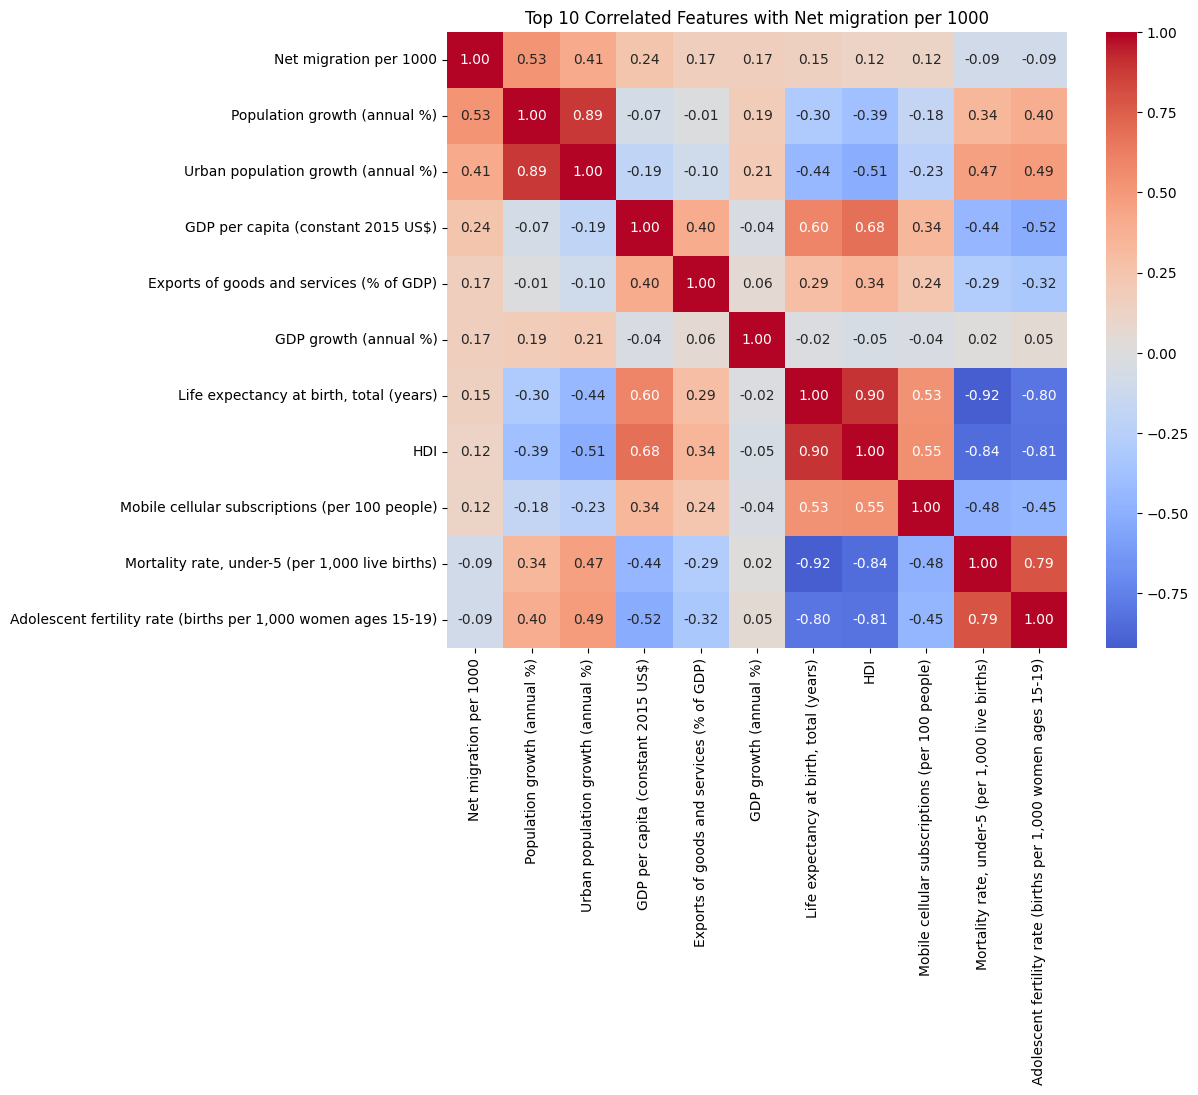

In [9]:
# ============================
# 9. Heatmap of Top 10 correlated features
# ============================
# Select top 10 correlated features
top_corr = all_corr.head(10).index.tolist()

# Place target first, then the others (deduplicated)
heatmap_vars = ["Net migration per 1000"] + [c for c in top_corr if c != "Net migration per 1000"]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(eda_work[heatmap_vars].corr(),
            annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Top 10 Correlated Features with Net migration per 1000")
plt.show()

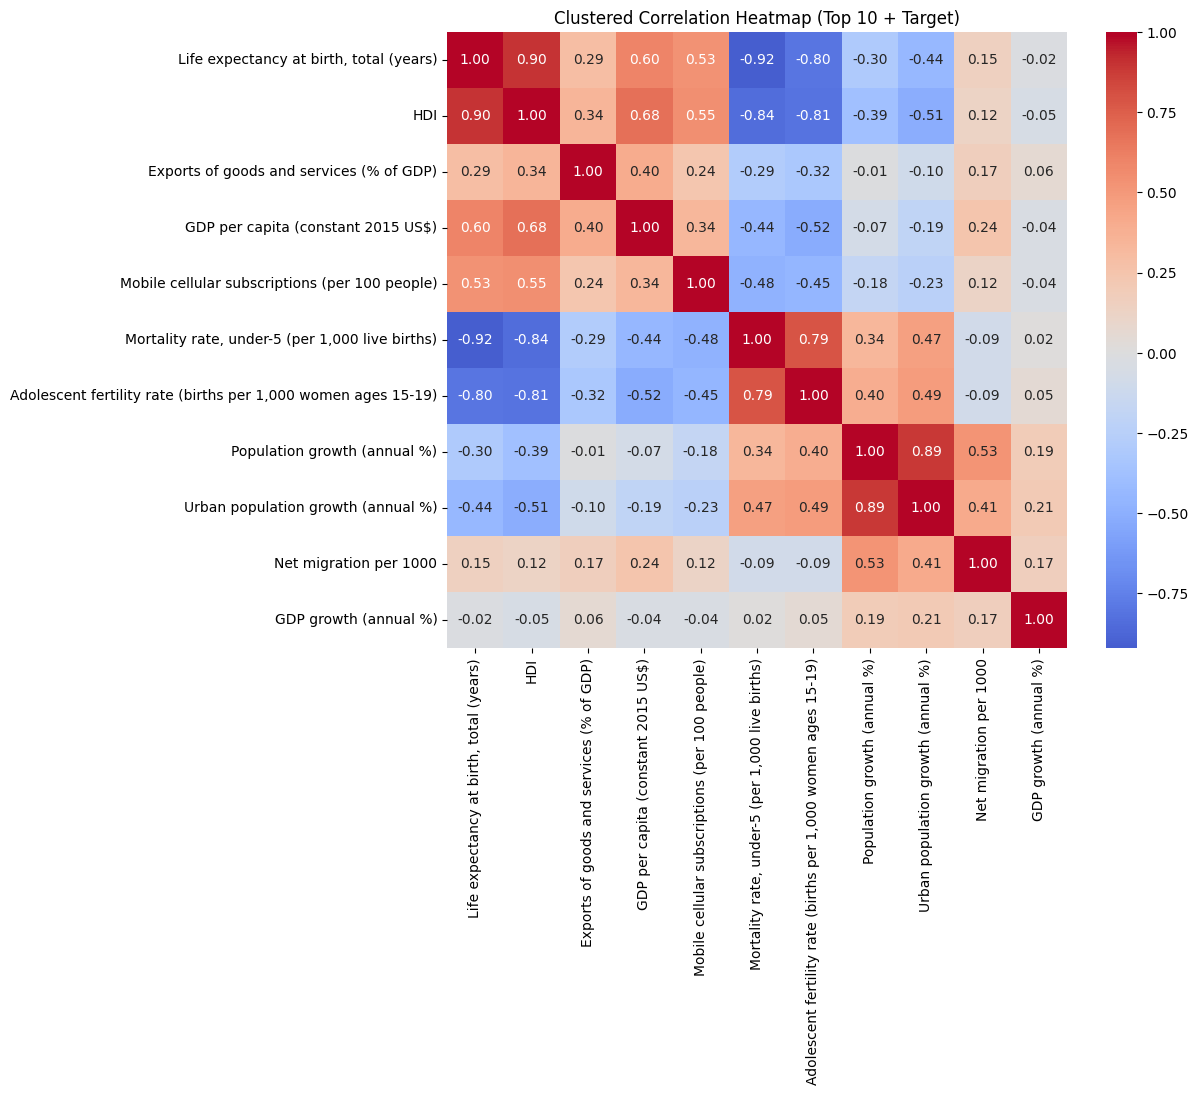

In [10]:
# ============================
# 9b. Clustered heatmap (to see feature groups)
# ============================
from scipy.cluster.hierarchy import linkage, leaves_list

# Correlation matrix for the same set of variables
corr = eda_work[heatmap_vars].corr()

# Use hierarchical clustering to order variables
link = linkage(corr, method='ward')
idx = leaves_list(link)
ordered_vars = corr.columns[idx]

# Plot clustered heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr.loc[ordered_vars, ordered_vars],
            annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Clustered Correlation Heatmap (Top 10 + Target)")
plt.show()

Columns for pairplot: ['Population growth (annual %)', 'Urban population growth (annual %)', 'GDP per capita (constant 2015 US$)', 'Exports of goods and services (% of GDP)', 'GDP growth (annual %)', 'Net migration per 1000']


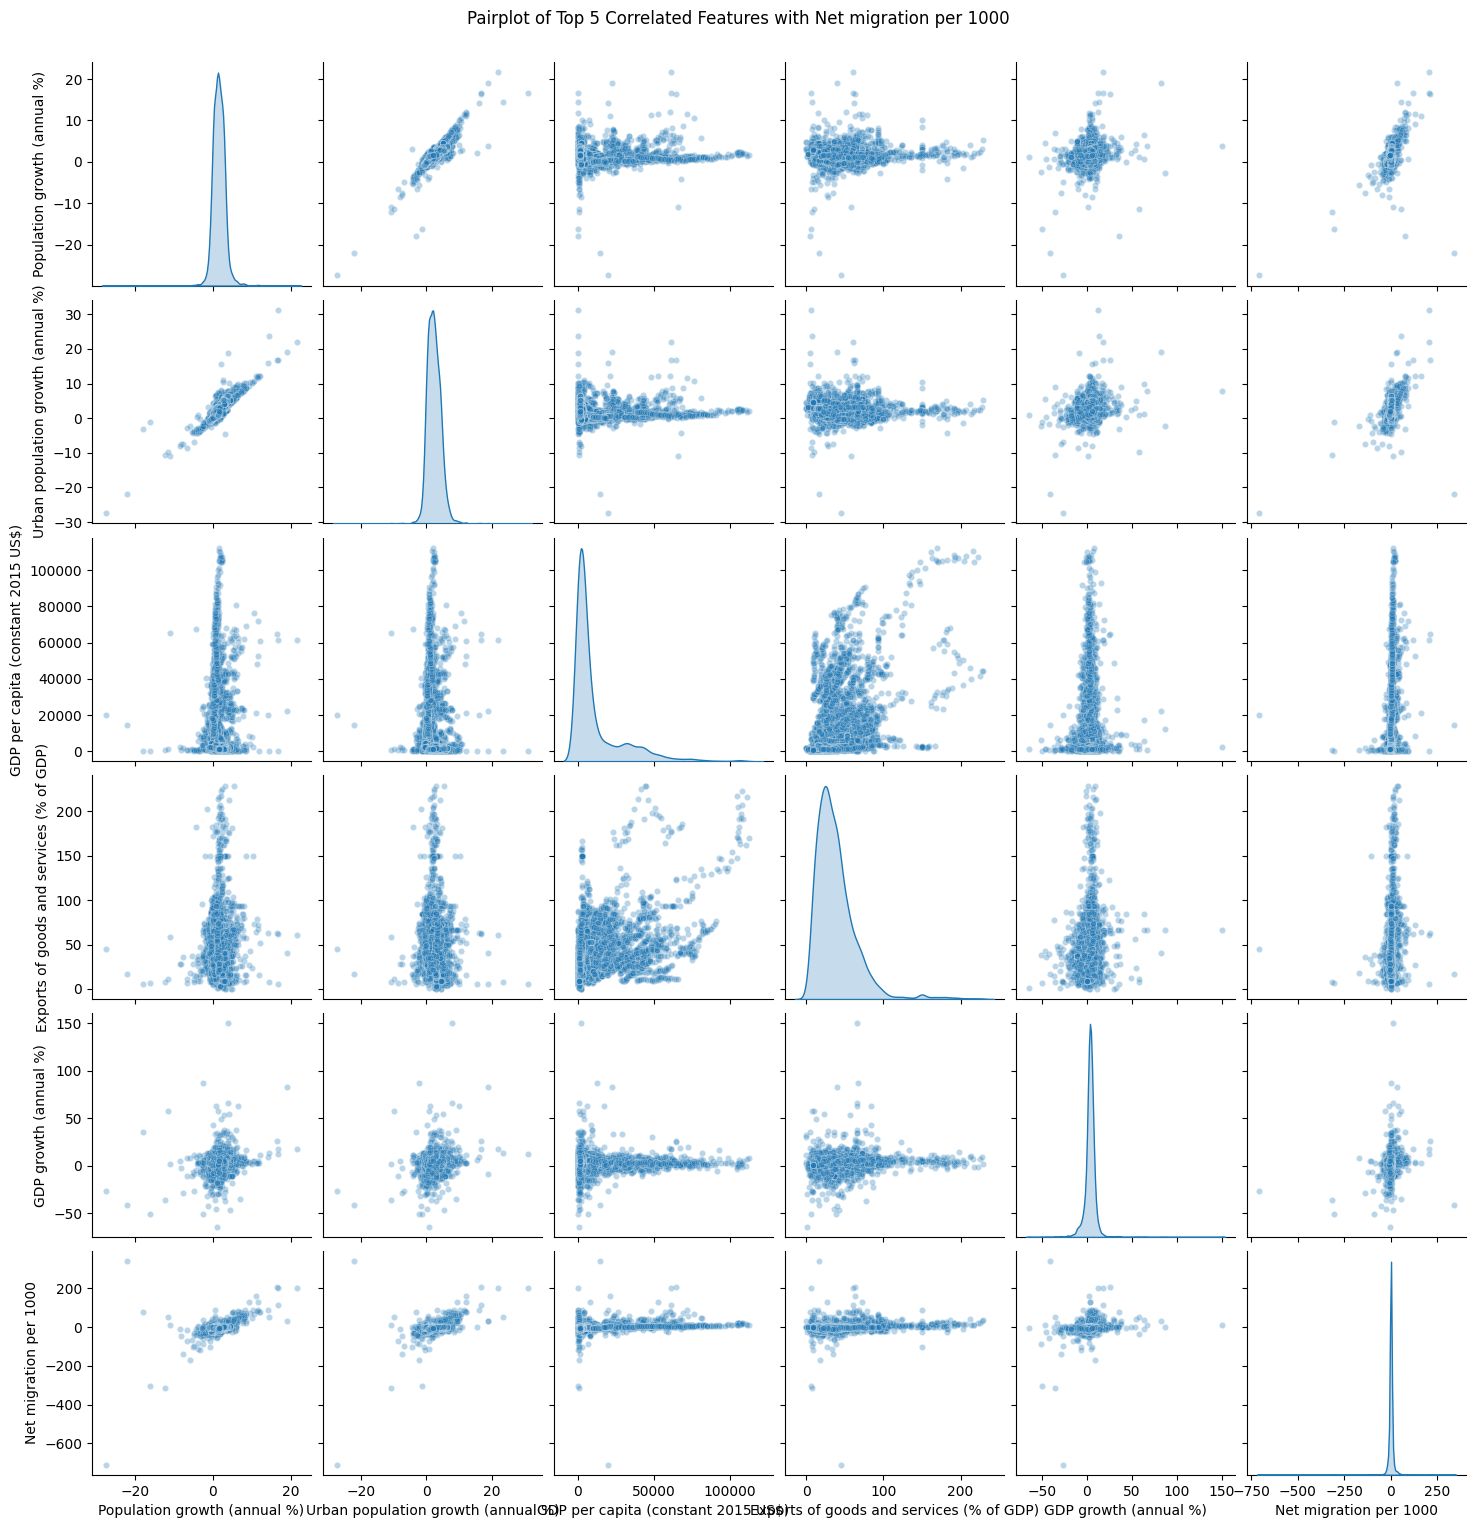

In [11]:
# ============================
# 10. Pairplot (Top 5 correlations)
# ============================

# Get top 5 correlated features (excluding raw Net migration)
top5 = all_corr.drop("Net migration", errors="ignore").head(5).index.tolist()

# Ensure unique column list
cols_for_plot = list(dict.fromkeys(top5 + ["Net migration per 1000"]))

# Sanity check
print("Columns for pairplot:", cols_for_plot)

# Pairplot with small tweaks for readability
sns.pairplot(
    eda[cols_for_plot],
    diag_kind="kde",
    plot_kws={'alpha': 0.3, 's': 20}  # transparency & smaller points
)

plt.suptitle("Pairplot of Top 5 Correlated Features with Net migration per 1000", y=1.02)
plt.show()

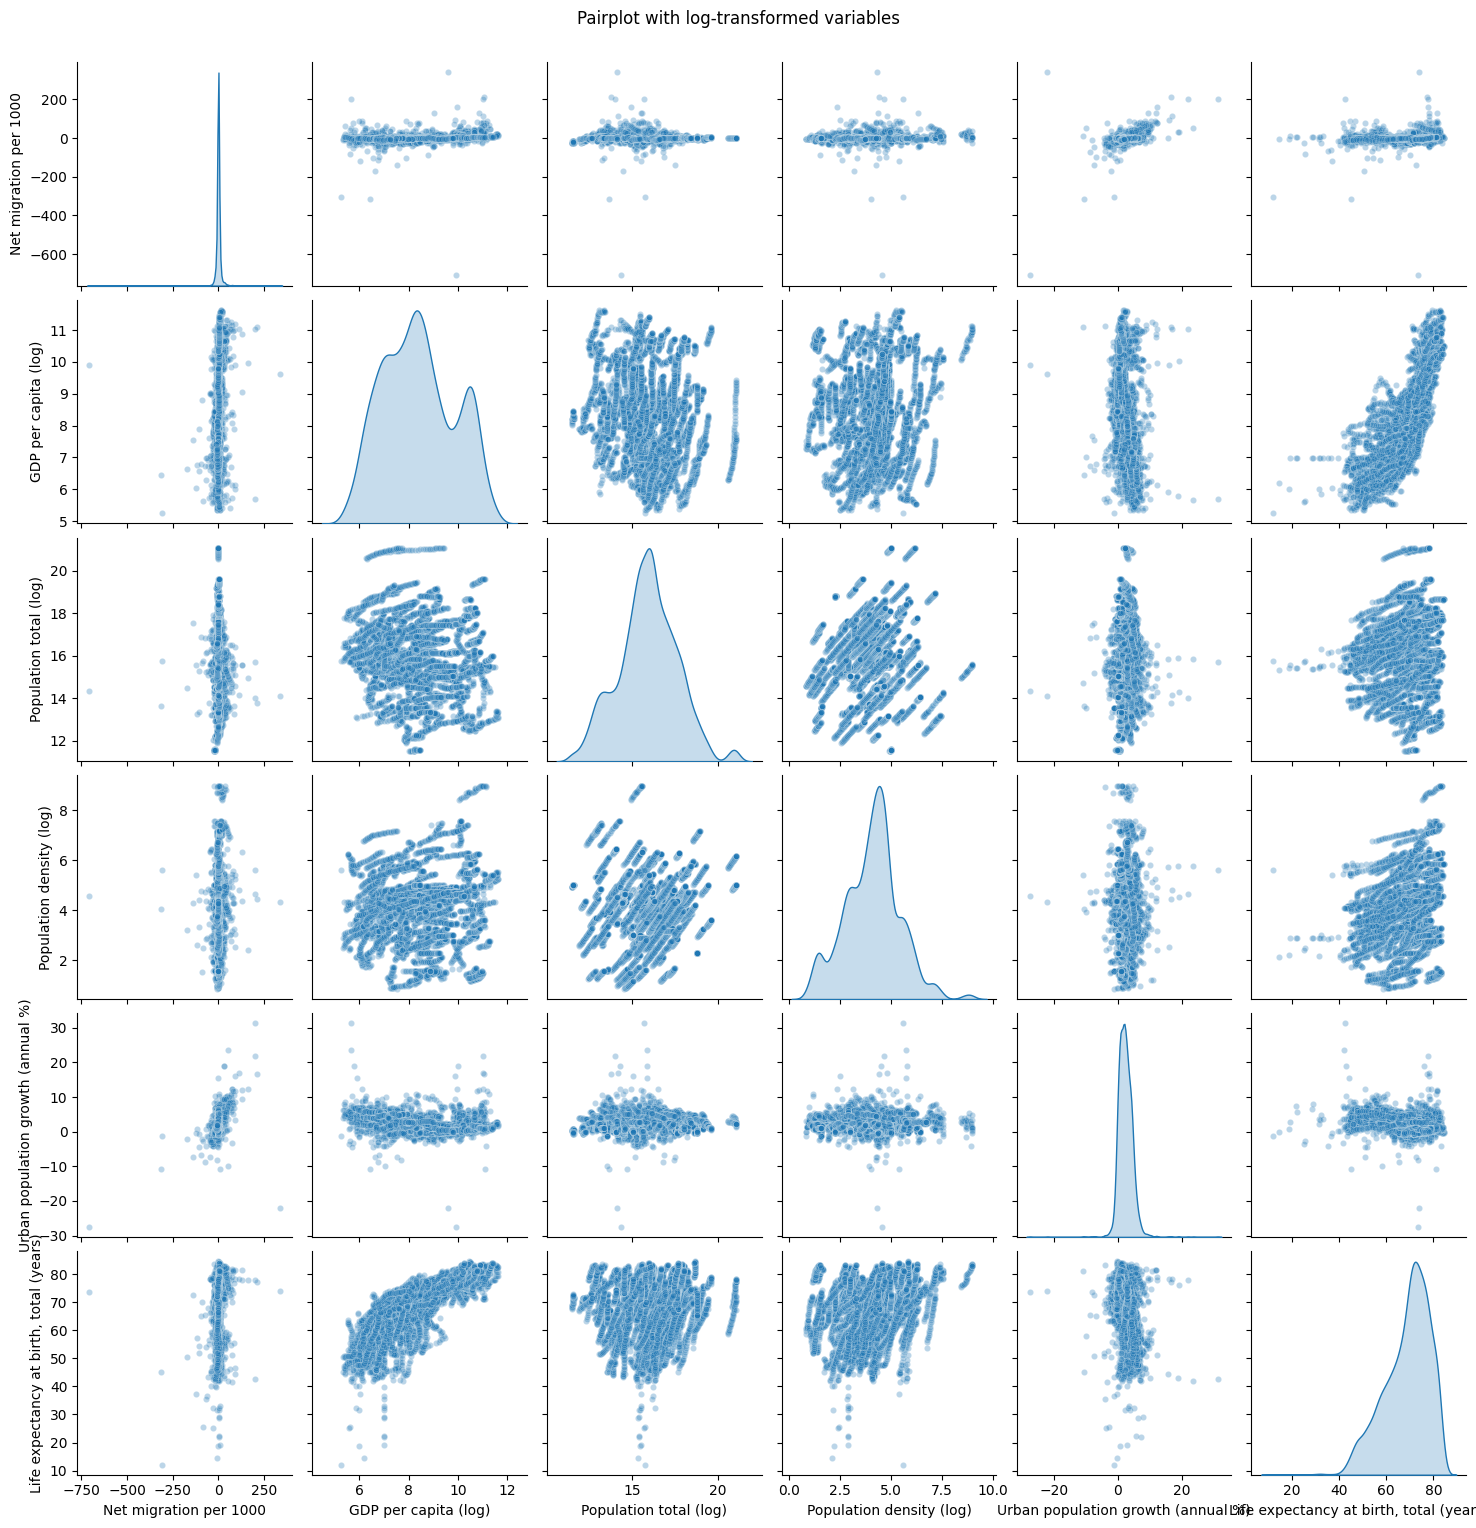

In [12]:
# ============================
# 10b. Pairplot with log transforms
# ============================
eda_plot = eda.copy()
eda_plot["GDP per capita (log)"] = np.log1p(eda_plot["GDP per capita (constant 2015 US$)"])
eda_plot["Population total (log)"] = np.log1p(eda_plot["Population, total"])
eda_plot["Population density (log)"] = np.log1p(eda_plot["Population density"])

cols_for_plot = [
    "Net migration per 1000",
    "GDP per capita (log)",
    "Population total (log)",
    "Population density (log)",
    "Urban population growth (annual %)",
    "Life expectancy at birth, total (years)"
]

sns.pairplot(eda_plot[cols_for_plot], diag_kind="kde", plot_kws={'alpha': 0.3, 's': 20})
plt.suptitle("Pairplot with log-transformed variables", y=1.02)
plt.show()

### Step 11. Country-level time-series plots

We compare migration trends across selected groups of countries.  
We focus on two illustrative cases:
1. **Big migration countries** – major sources and destinations.  
2. **Small states with volatile migration** – small populations where migration swings are amplified.  

In [13]:
# Function to plot Net migration per 1000 for a given list of countries
def plot_time_series(countries, group_name, indicator="Net migration per 1000", ylim=None):
    """
    Plot time series for a given list of countries and indicator.
    
    Parameters:
        countries (list): List of country names to plot
        group_name (str): Label for the group of countries (used in plot title)
        indicator (str): Column name of indicator to plot
        ylim (tuple): Optional y-axis limits, e.g., (-50, 50)
    """
    plt.figure(figsize=(10, 6))
    
    for country in countries:
        subset = eda[eda['Country_Name'] == country]
        plt.plot(subset['Year'], subset[indicator], marker="o", label=country)
    
    plt.axhline(0, color="black", linestyle="--", linewidth=0.7)
    plt.title(f"{group_name}: {indicator} over Time")
    plt.xlabel("Year")
    plt.ylabel(indicator)
    plt.legend()
    
    if ylim:
        plt.ylim(ylim)
    
    plt.tight_layout()
    plt.show()

### Example 1: Big migration countries

This group includes the **United States, Germany, India, Mexico, and Afghanistan**.  
- The US and Germany are among the world’s largest *receiving countries*.  
- India and Mexico are among the largest *sending countries*.  
- Afghanistan illustrates conflict-driven migration and displacement.  

👉 Together, these countries highlight **contrasting migration patterns** between destinations and sources of migrants.

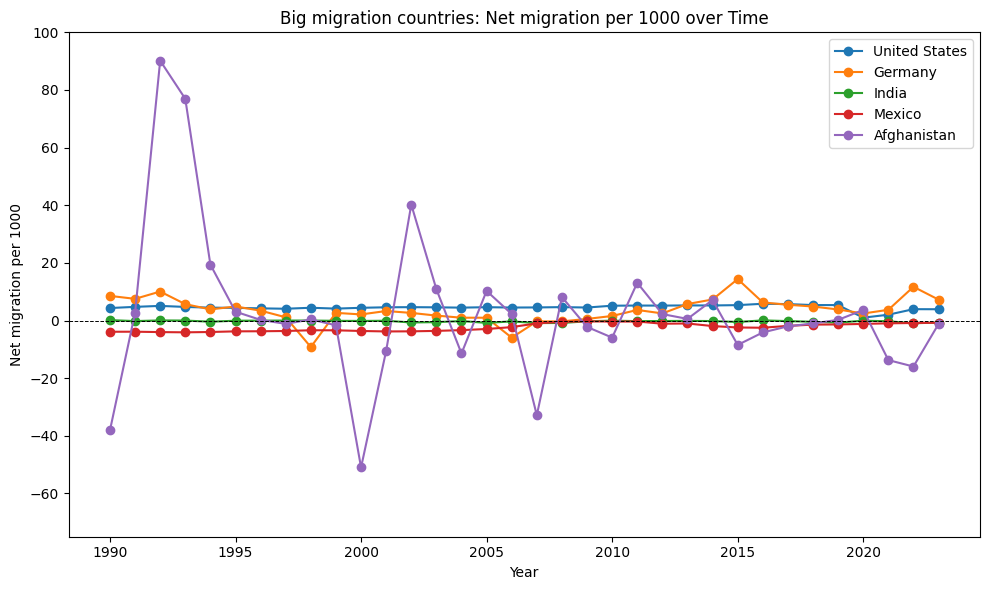

In [14]:
plot_time_series(
    ["United States", "Germany", "India", "Mexico", "Afghanistan"],
    group_name="Big migration countries",
    ylim=(-75, 100)
)

### Example 2: Small states with volatile migration

This group covers **Luxembourg, Malta, Cyprus, Qatar, and Iceland**.  
- Small European states (Luxembourg, Malta, Cyprus) → strong EU labor mobility effects.  
- Qatar → heavy reliance on foreign labor, linked to economic cycles.  
- Iceland → small island economy where migration swings are tied to crises like 2008.  

👉 These cases illustrate how **scale effects and specialization** create highly volatile migration trends.

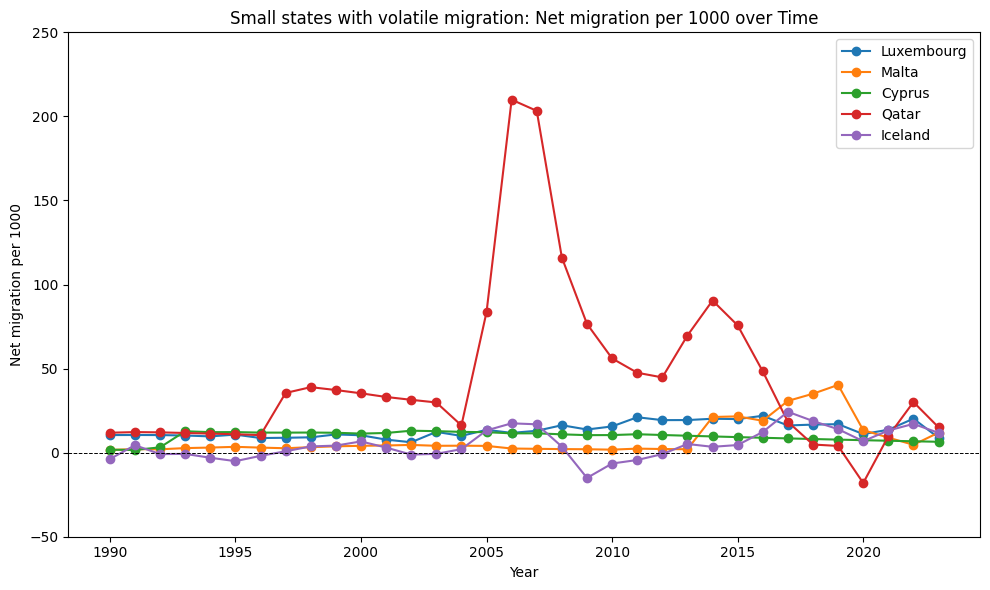

In [15]:
plot_time_series(
    ["Luxembourg", "Malta", "Cyprus", "Qatar", "Iceland"],
    group_name="Small states with volatile migration",
    ylim=(-50, 250)
)

### Step 12. Correlation Heatmap (Focused Predictors)

We focus on the most relevant predictors identified earlier:
- **GDP per capita**
- **Unemployment**
- **Population growth**
- **HDI**
- **Net migration per 1000**

This heatmap provides a compact view of correlations between these variables.

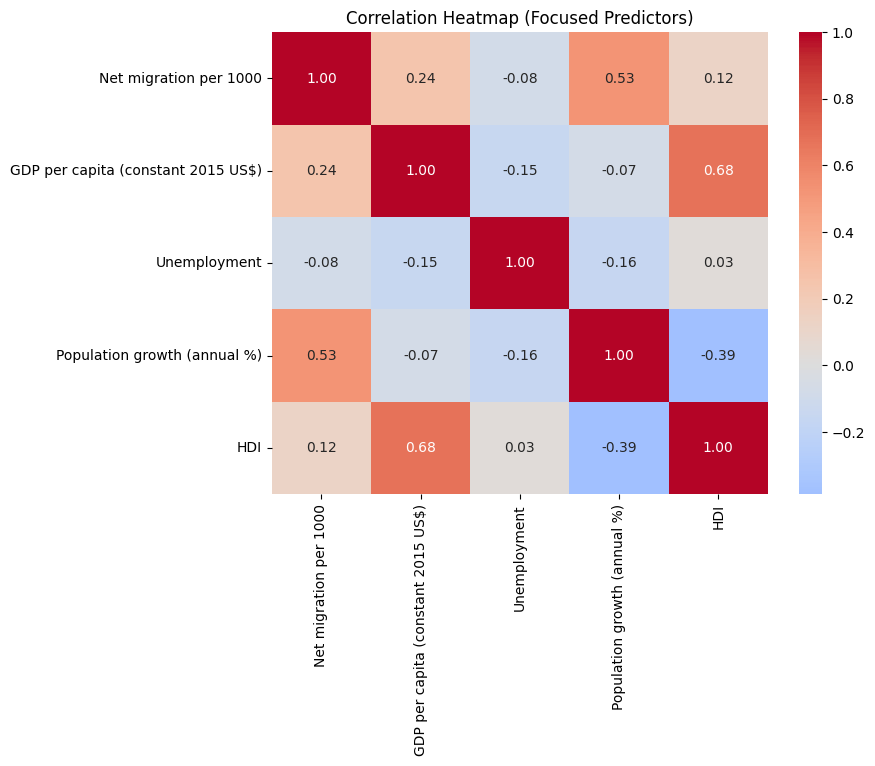

In [16]:
# ============================
# 12. Correlation Heatmap (Focused Predictors)
# ============================

features_focus = [
    "Net migration per 1000",
    "GDP per capita (constant 2015 US$)",
    "Unemployment",
    "Population growth (annual %)",
    "HDI"
]

plt.figure(figsize=(8, 6))
sns.heatmap(eda[features_focus].corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap (Focused Predictors)")
plt.show()

### Step 13. Distributions & Transformations

We examine the distribution of key predictors:
- Some indicators (GDP per capita, population) are highly skewed.
- For such variables, **log transformations** help stabilize variance and make patterns clearer.

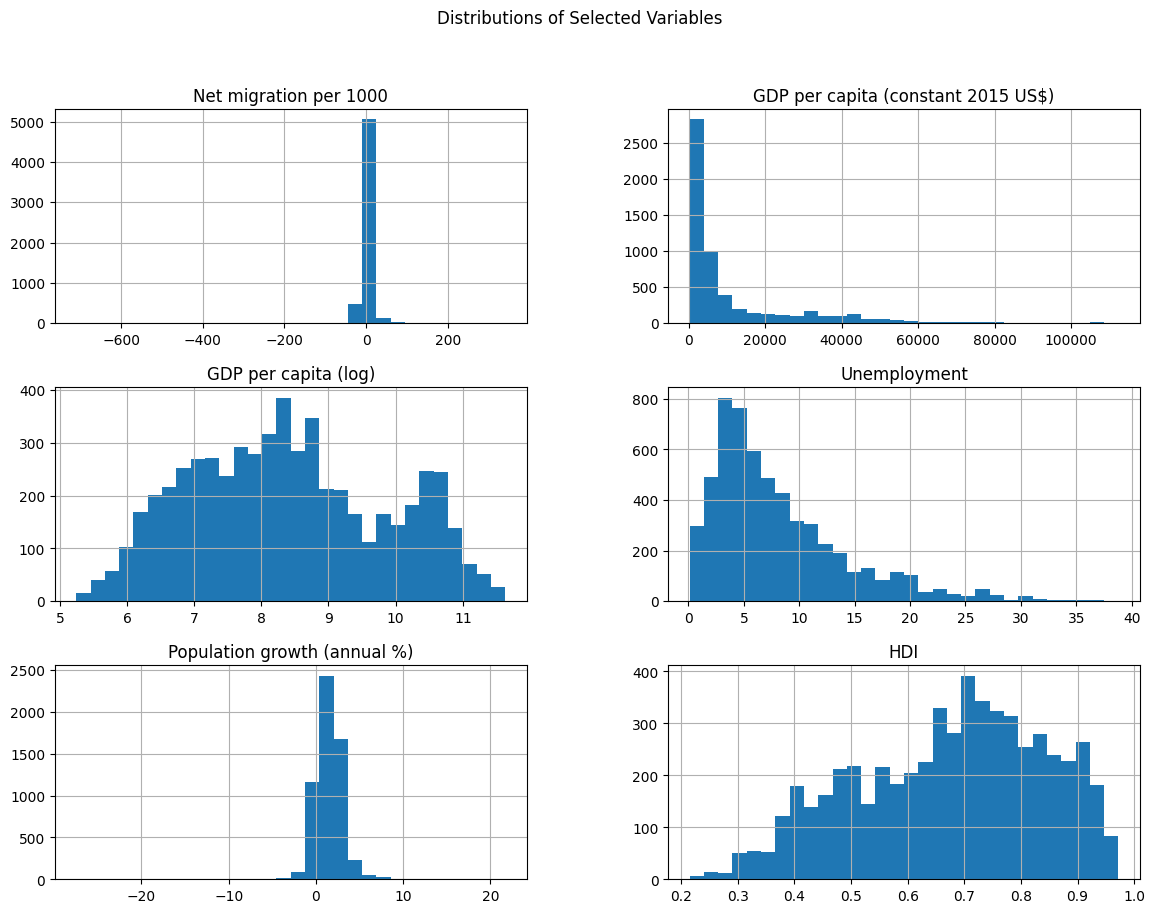

In [17]:
# ============================
# 13. Distributions & Transformations
# ============================

# Create log-transformed GDP per capita
eda["GDP per capita (log)"] = np.log1p(eda["GDP per capita (constant 2015 US$)"])

# Select subset of variables for clearer distribution plots
features_for_dists = [
    "Net migration per 1000",
    "GDP per capita (constant 2015 US$)",
    "GDP per capita (log)",
    "Unemployment",
    "Population growth (annual %)",
    "HDI"
]

eda[features_for_dists].hist(bins=30, figsize=(14, 10))
plt.suptitle("Distributions of Selected Variables")
plt.show()

### Step 14. Outlier Analysis

Global data often contains **outliers**, which may be:
- **Real extremes**:  
  - High GDP per capita (Luxembourg, Qatar).  
  - High population density (Singapore, Hong Kong).  
  - Migration spikes (Syria, US, Germany).  

- **Unlikely anomalies** (flagged, not treated yet):  
  - GDP growth >±20%.  
  - Population/urban growth >±10%.  
  - Under-5 mortality >250 per 1,000.  

👉 In **EDA**, we keep all outliers to explore patterns.  
👉 In **Modeling**, we will apply **caps or log transforms** to reduce their influence.

In [18]:
# ============================
# 14. Outlier Analysis
# ============================

outlier_vars = [
    "Net migration per 1000",
    "GDP growth (annual %)",
    "GDP per capita (constant 2015 US$)",
    "Population growth (annual %)",
    "Urban population growth (annual %)",
    "Mortality rate, under-5 (per 1,000 live births)",
    "Population density",
    "Unemployment",
    "HDI"
]

eda[outlier_vars].describe(percentiles=[0.01, 0.05, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,50%,95%,99%,max
Net migration per 1000,"5,712.00",0.01,17.73,-709.90,-29.15,-14.88,-0.29,14.41,44.69,340.85
GDP growth (annual %),"5,712.00",3.40,6.68,-64.05,-16.00,-5.82,3.75,10.44,18.18,149.97
GDP per capita (constant 2015 US$),"5,712.00","11,617.87","17,190.39",188.66,290.95,473.95,"4,000.30","48,129.76","76,363.67","112,417.88"
Population growth (annual %),"5,712.00",1.52,1.77,-27.47,-2.01,-0.63,1.45,3.76,6.07,21.70
Urban population growth (annual %),"5,712.00",2.30,2.21,-27.46,-2.01,-0.47,2.13,5.64,7.83,31.27
"Mortality rate, under-5 (per 1,000 live births)","5,712.00",46.46,52.53,2.10,2.60,3.70,24.45,158.64,221.60,478.90
Population density,"5,712.00",166.00,547.66,1.36,2.30,3.86,65.36,492.41,"1,568.76","7,965.88"
Unemployment,"5,712.00",8.08,6.12,0.10,0.62,1.35,6.33,20.12,28.12,38.80
HDI,"5,712.00",0.68,0.17,0.21,0.30,0.39,0.70,0.92,0.95,0.97


### Step 14b. Migration Inflows & Outflows (Country Ranking)

To complement outlier detection, we rank countries by **average net migration per 1000**:  
- Top 10 inflows (migration destinations).  
- Top 10 outflows (migration sources).

Top 10 average inflows:
 Country_Name
Qatar                  44.83
United Arab Emirates   39.65
Bahrain                18.53
Equatorial Guinea      14.30
Saudi Arabia           13.60
Luxembourg             13.40
Singapore              13.16
Oman                   11.98
Jordan                 11.12
Cyprus                  9.73
Name: Net migration per 1000, dtype: float64

Top 10 average outflows:
 Country_Name
Tonga         -20.43
Samoa         -17.41
Moldova       -16.12
Albania       -14.14
Georgia       -13.71
Guyana        -13.42
El Salvador   -10.87
Fiji          -10.09
Armenia       -10.00
Eritrea        -9.50
Name: Net migration per 1000, dtype: float64


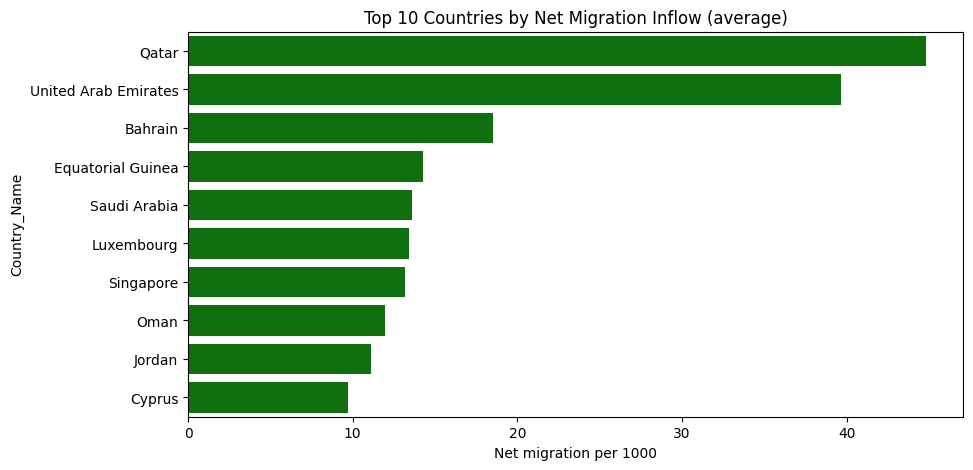

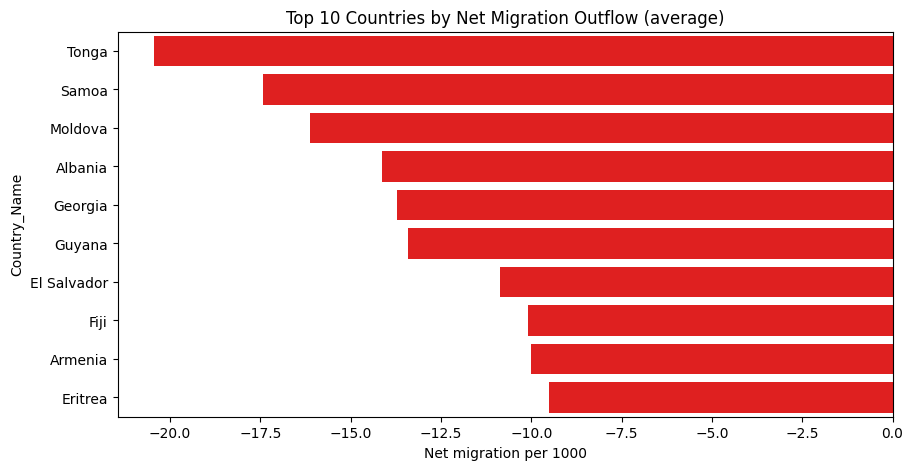

In [19]:
# ============================
# 14b. Migration Inflows & Outflows
# ============================

top_inflows = eda.groupby("Country_Name")["Net migration per 1000"].mean().nlargest(10)
top_outflows = eda.groupby("Country_Name")["Net migration per 1000"].mean().nsmallest(10)

print("Top 10 average inflows:\n", top_inflows)
print("\nTop 10 average outflows:\n", top_outflows)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_inflows.values, y=top_inflows.index, color="green")
plt.title("Top 10 Countries by Net Migration Inflow (average)")
plt.xlabel("Net migration per 1000")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=top_outflows.values, y=top_outflows.index, color="red")
plt.title("Top 10 Countries by Net Migration Outflow (average)")
plt.xlabel("Net migration per 1000")
plt.show()

### Step 15. Scatterplots: Migration vs Key Predictors

Scatterplots help visualize relationships between **Net migration per 1000** and selected predictors:
- GDP per capita (log-transformed)
- Unemployment
- Population growth (annual %)
- HDI

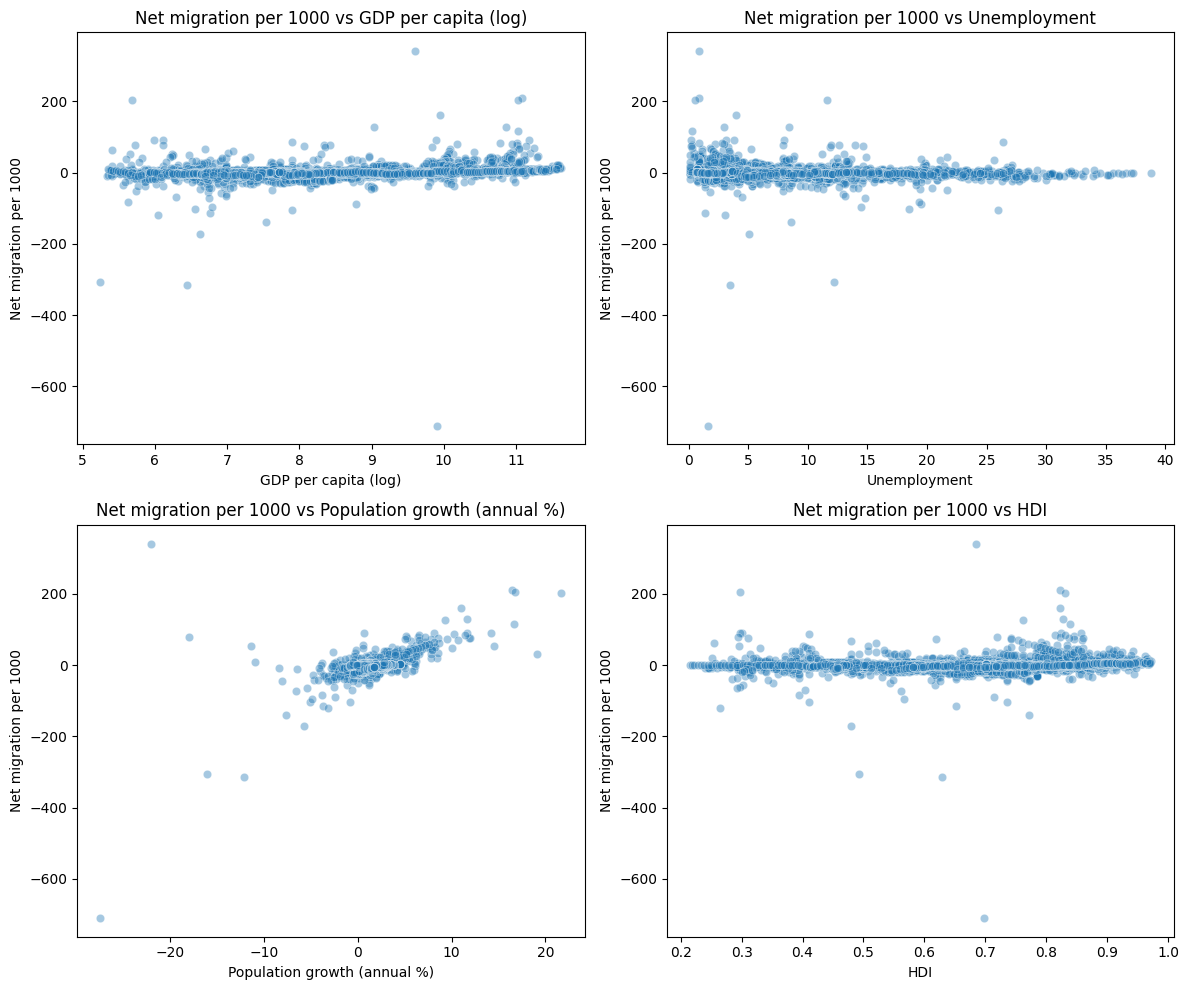

In [20]:
# ============================
# 15. Scatterplots: Migration vs Key Predictors
# ============================

scatter_vars = [
    "GDP per capita (log)",
    "Unemployment",
    "Population growth (annual %)",
    "HDI"
]

plt.figure(figsize=(12, 10))
for i, var in enumerate(scatter_vars, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=eda[var], y=eda["Net migration per 1000"], alpha=0.4)
    plt.title(f"Net migration per 1000 vs {var}")
plt.tight_layout(); plt.show()

### Step 15b. Case Studies

We illustrate **migration trajectories** for four key countries:
- United States & Germany: major destinations.  
- India: major origin.  
- Syria: conflict-driven outflows.

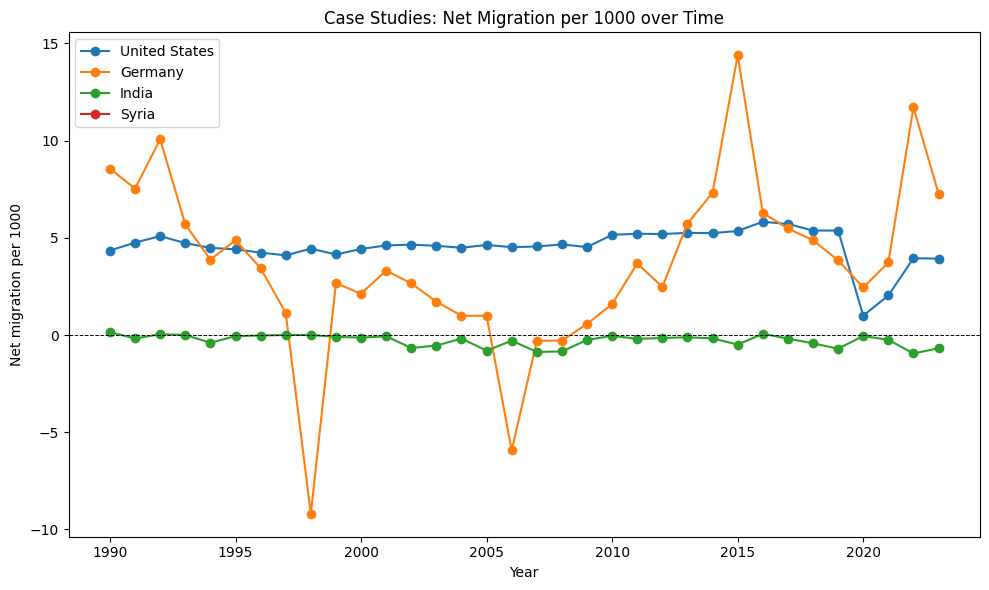

In [21]:
# ============================
# 15b. Case Studies
# ============================

case_countries = ["United States", "Germany", "India", "Syria"]

plt.figure(figsize=(10, 6))
for c in case_countries:
    subset = eda[eda["Country_Name"] == c]
    plt.plot(subset["Year"], subset["Net migration per 1000"], marker="o", label=c)

plt.axhline(0, color="black", linestyle="--", linewidth=0.7)
plt.title("Case Studies: Net Migration per 1000 over Time")
plt.xlabel("Year"); plt.ylabel("Net migration per 1000")
plt.legend(); plt.tight_layout(); plt.show()

### Step 16. Summary & Next Steps

- EDA revealed meaningful correlations:
  - Migration links with **population growth**, **GDP per capita**, **HDI**, and **unemployment**.  
- Distributions are skewed → **log transforms** will be useful.  
- Outliers exist, but they are **kept in EDA**.  
- For modeling:
  - Consider **caps** on unlikely anomalies (growth >±20%).  
  - Use **log-transformed variables** for scale-heavy indicators.  
  - Proceed with model development in `03_modeling.ipynb` (Linear Regression, Ridge, Random Forest).  